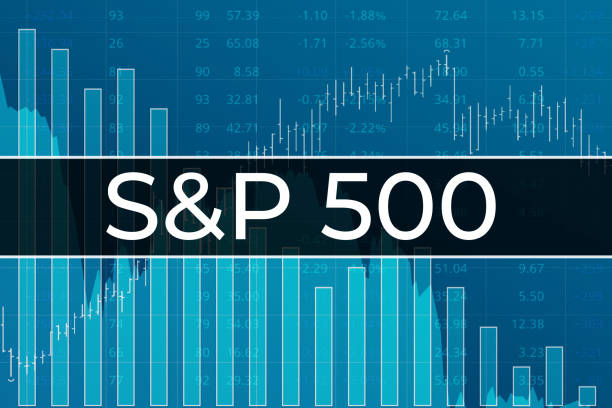

### Objective

The Standard and Poor's 500 (S&P 500) is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. 
The S&P 500 index is a free-float weighted/capitalization-weighted index. The performance of the S&P 500 is a good indicator of the health of the economy in the United States. 

1. Show a visualization of how the specific stocks from the weighted sectors of the sp500 compares with the sp500 index the exchange traded fund SPY, one example from each sector.

2. Using clustering, can we visualize the distinct sectors in the SP500 since the stocks within them should behave similarly.  

3. What are the most correlated and least correlated stocks within the sp500 



In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [2]:
import yfinance as yf
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Create a dataframe with the current companies in the S&P 500 (sp500)

In [3]:
sp500_companies = pd.read_csv("/Users/rosario/Code/CodeOp/01-codeop-personal-project/sp500_companies.csv")

In [4]:
sp500_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    int64 
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


There are 503 companies in the sp500. Let's extract the historical data for from the Yahoo Finance, using the yfinance API

In [5]:
def get_ticker_history(df, period="1mo"):
    # Dictionary to store historical data for each ticker
    ticker_data = {}
    
    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        ticker = row['Symbol']  # Assuming 'Symbol' is the column containing ticker symbols
        print("Fetching data for ticker:", ticker)  # Print the ticker being processed
        # Fetch historical data for the ticker
        history_data = yf.Ticker(ticker).history(period=period)
        # Add the ticker symbol as a feature in the historical data DataFrame
        history_data['Symbol'] = ticker
        # Store the historical data in the dictionary
        ticker_data[ticker] = history_data
        
    # Concatenate historical data for all tickers into a single DataFrame
    combined_data = pd.concat(ticker_data.values())
    combined_data.index.name = 'Date'  # Set the name of the index to 'Date'
    
    return combined_data

sp500_history = get_ticker_history(sp500_companies, period="max")

Fetching data for ticker: MMM
Fetching data for ticker: AOS
Fetching data for ticker: ABT
Fetching data for ticker: ABBV
Fetching data for ticker: ACN
Fetching data for ticker: ADBE
Fetching data for ticker: AMD
Fetching data for ticker: AES
Fetching data for ticker: AFL
Fetching data for ticker: A
Fetching data for ticker: APD
Fetching data for ticker: ABNB
Fetching data for ticker: AKAM
Fetching data for ticker: ALB
Fetching data for ticker: ARE
Fetching data for ticker: ALGN
Fetching data for ticker: ALLE
Fetching data for ticker: LNT
Fetching data for ticker: ALL
Fetching data for ticker: GOOGL
Fetching data for ticker: GOOG
Fetching data for ticker: MO
Fetching data for ticker: AMZN
Fetching data for ticker: AMCR
Fetching data for ticker: AEE
Fetching data for ticker: AAL
Fetching data for ticker: AEP
Fetching data for ticker: AXP
Fetching data for ticker: AIG
Fetching data for ticker: AMT
Fetching data for ticker: AWK
Fetching data for ticker: AMP
Fetching data for ticker: AME
Fe

BRK.B: No timezone found, symbol may be delisted


Fetching data for ticker: BBY
Fetching data for ticker: BIO
Fetching data for ticker: TECH
Fetching data for ticker: BIIB
Fetching data for ticker: BLK
Fetching data for ticker: BX
Fetching data for ticker: BA
Fetching data for ticker: BKNG
Fetching data for ticker: BWA
Fetching data for ticker: BXP
Fetching data for ticker: BSX
Fetching data for ticker: BMY
Fetching data for ticker: AVGO
Fetching data for ticker: BR
Fetching data for ticker: BRO


BF.B: No price data found, symbol may be delisted (1d 1925-05-26 -> 2024-05-02)


Fetching data for ticker: BF.B
Fetching data for ticker: BLDR
Fetching data for ticker: BG
Fetching data for ticker: CDNS
Fetching data for ticker: CZR
Fetching data for ticker: CPT
Fetching data for ticker: CPB
Fetching data for ticker: COF
Fetching data for ticker: CAH
Fetching data for ticker: KMX
Fetching data for ticker: CCL
Fetching data for ticker: CARR
Fetching data for ticker: CTLT
Fetching data for ticker: CAT
Fetching data for ticker: CBOE
Fetching data for ticker: CBRE
Fetching data for ticker: CDW
Fetching data for ticker: CE
Fetching data for ticker: COR
Fetching data for ticker: CNC
Fetching data for ticker: CNP
Fetching data for ticker: CF
Fetching data for ticker: CHRW
Fetching data for ticker: CRL
Fetching data for ticker: SCHW
Fetching data for ticker: CHTR
Fetching data for ticker: CVX
Fetching data for ticker: CMG
Fetching data for ticker: CB
Fetching data for ticker: CHD
Fetching data for ticker: CI
Fetching data for ticker: CINF
Fetching data for ticker: CTAS
Fet

Fetching data for ticker: NVR
Fetching data for ticker: NXPI
Fetching data for ticker: ORLY
Fetching data for ticker: OXY
Fetching data for ticker: ODFL
Fetching data for ticker: OMC
Fetching data for ticker: ON
Fetching data for ticker: OKE
Fetching data for ticker: ORCL
Fetching data for ticker: OTIS
Fetching data for ticker: PCAR
Fetching data for ticker: PKG
Fetching data for ticker: PANW
Fetching data for ticker: PARA
Fetching data for ticker: PH
Fetching data for ticker: PAYX
Fetching data for ticker: PAYC
Fetching data for ticker: PYPL
Fetching data for ticker: PNR
Fetching data for ticker: PEP
Fetching data for ticker: PFE
Fetching data for ticker: PCG
Fetching data for ticker: PM
Fetching data for ticker: PSX
Fetching data for ticker: PNW
Fetching data for ticker: PXD
Fetching data for ticker: PNC
Fetching data for ticker: POOL
Fetching data for ticker: PPG
Fetching data for ticker: PPL
Fetching data for ticker: PFG
Fetching data for ticker: PG
Fetching data for ticker: PGR
Fe

We are also extracting the historical data for an S&P 500 exchange traded fund, a stock that can be purchased that follows the weights and composition of the S&P 500. 

In [6]:
spy = yf.Ticker('spy')
sp500_etf_history = spy.history(period='max')

In [7]:
sp500_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Adj Close
Date,,,,,,,,,
1962-01-02 00:00:00-05:00,0.0,0.415093,0.402885,0.405937,254509.0,0.0,0.0,MMM,NaN
1962-01-03 00:00:00-05:00,0.0,0.408989,0.399069,0.408989,505190.0,0.0,0.0,MMM,NaN
1962-01-04 00:00:00-05:00,0.0,0.415856,0.408989,0.408989,254509.0,0.0,0.0,MMM,NaN
1962-01-05 00:00:00-05:00,0.0,0.407463,0.396780,0.398307,376979.0,0.0,0.0,MMM,NaN
1962-01-08 00:00:00-05:00,0.0,0.399069,0.393728,0.396017,399942.0,0.0,0.0,MMM,NaN


In [8]:
sp500_etf_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.781355,24.781355,24.658065,24.763742,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,24.781351,24.939867,24.781351,24.939867,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,24.922264,25.010329,24.869425,24.992716,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,25.027910,25.274491,25.010298,25.256878,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.344966,25.415418,25.063160,25.362579,531500,0.0,0.0,0.0


#### Now we have the 2 datasets we want to work with, sp500_etf_history and sp500_history.

### Data Clean-up

In [9]:
#make a copy of the data set for cleaning to avoid calling the api to scrape the data
sp500_etf_2 = sp500_etf_history
sp500_history_2 = sp500_history

In [10]:
#Add column 'Symbol' to sp500_etf_2
sp500_etf_2['Symbol'] = 'SPY'
sp500_etf_2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Symbol
Date,,,,,,,,,
1993-01-29 00:00:00-05:00,24.781355,24.781355,24.658065,24.763742,1003200,0.0,0.0,0.0,SPY
1993-02-01 00:00:00-05:00,24.781351,24.939867,24.781351,24.939867,480500,0.0,0.0,0.0,SPY
1993-02-02 00:00:00-05:00,24.922264,25.010329,24.869425,24.992716,201300,0.0,0.0,0.0,SPY
1993-02-03 00:00:00-05:00,25.027910,25.274491,25.010298,25.256878,529400,0.0,0.0,0.0,SPY
1993-02-04 00:00:00-05:00,25.344966,25.415418,25.063160,25.362579,531500,0.0,0.0,0.0,SPY


In [11]:
# Drop multiple columns
stock_columns_to_drop = ['High', 'Low', 'Volume']
etf_columns_to_drop = ['High', 'Low', 'Volume']


sp500_etf_2.drop(etf_columns_to_drop, axis=1, inplace=True)
sp500_history_2.drop(stock_columns_to_drop, axis=1, inplace=True)

In [12]:
sp500_etf_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7870 entries, 1993-01-29 00:00:00-05:00 to 2024-05-01 00:00:00-04:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           7870 non-null   float64
 1   Close          7870 non-null   float64
 2   Dividends      7870 non-null   float64
 3   Stock Splits   7870 non-null   float64
 4   Capital Gains  7870 non-null   float64
 5   Symbol         7870 non-null   object 
dtypes: float64(5), object(1)
memory usage: 430.4+ KB


In [13]:
sp500_history_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4221961 entries, 1962-01-02 00:00:00-05:00 to 2024-05-01 00:00:00-04:00
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Open          float64
 1   Close         float64
 2   Dividends     float64
 3   Stock Splits  float64
 4   Symbol        object 
 5   Adj Close     float64
dtypes: float64(5), object(1)
memory usage: 225.5+ MB


In [14]:
#Count the nulls in the dataframe
null_counts = sp500_history_2.isnull().sum()

In [15]:
null_counts

Open                  1
Close                 1
Dividends             0
Stock Splits          0
Symbol                0
Adj Close       4221961
dtype: int64

In [16]:
#Drop the nulls
sp500_history_2 = sp500_history_2.dropna(subset=['Open', 'Close'])

In [17]:
sp500_etf_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7870 entries, 1993-01-29 00:00:00-05:00 to 2024-05-01 00:00:00-04:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           7870 non-null   float64
 1   Close          7870 non-null   float64
 2   Dividends      7870 non-null   float64
 3   Stock Splits   7870 non-null   float64
 4   Capital Gains  7870 non-null   float64
 5   Symbol         7870 non-null   object 
dtypes: float64(5), object(1)
memory usage: 430.4+ KB


In [18]:
sp500_history_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4221960 entries, 1962-01-02 00:00:00-05:00 to 2024-05-01 00:00:00-04:00
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Open          float64
 1   Close         float64
 2   Dividends     float64
 3   Stock Splits  float64
 4   Symbol        object 
 5   Adj Close     float64
dtypes: float64(5), object(1)
memory usage: 225.5+ MB


In [19]:
#subset sp500_etf_2 to show only the last 25 years
subset_sp500_etf = sp500_etf_2['1999-05-01':'2024-05-01']

In [20]:
#subset sp500_history_2 to show only the last 25years
sort_sp500_history_2 = sp500_history_2.sort_index()
subset_sp500_stocks = sp500_history_2.loc['1999-05-03':'2024-05-01']

In [21]:
subset_sp500_etf.head()

,Open,Close,Dividends,Stock Splits,Capital Gains,Symbol
Date,,,,,,
1999-05-03 00:00:00-04:00,85.161052,86.597023,0.0,0.0,0.0,SPY
1999-05-04 00:00:00-04:00,86.238065,85.360527,0.0,0.0,0.0,SPY
1999-05-05 00:00:00-04:00,85.480187,86.038620,0.0,0.0,0.0,SPY
1999-05-06 00:00:00-04:00,85.799252,85.510063,0.0,0.0,0.0,SPY
1999-05-07 00:00:00-04:00,85.839144,86.158249,0.0,0.0,0.0,SPY


In [22]:
subset_sp500_stocks.head()

,Open,Close,Dividends,Stock Splits,Symbol,Adj Close
Date,,,,,,
1999-05-03 00:00:00-04:00,16.438655,17.098932,0.0,0.0,MMM,NaN
1999-05-04 00:00:00-04:00,17.064769,17.110306,0.0,0.0,MMM,NaN
1999-05-05 00:00:00-04:00,17.133084,16.825714,0.0,0.0,MMM,NaN
1999-05-06 00:00:00-04:00,16.575257,16.780172,0.0,0.0,MMM,NaN
1999-05-07 00:00:00-04:00,16.825713,16.916784,0.0,0.0,MMM,NaN


In [23]:
#combine the 2 datasets into one
combined_sp500_historical = pd.concat([subset_sp500_etf, subset_sp500_stocks])

In [24]:
combined_sp500_historical

,Open,Close,Dividends,Stock Splits,Capital Gains,Symbol,Adj Close
Date,,,,,,,
1999-05-03 00:00:00-04:00,85.161052,86.597023,0.0,0.0,0.0,SPY,NaN
1999-05-04 00:00:00-04:00,86.238065,85.360527,0.0,0.0,0.0,SPY,NaN
1999-05-05 00:00:00-04:00,85.480187,86.038620,0.0,0.0,0.0,SPY,NaN
1999-05-06 00:00:00-04:00,85.799252,85.510063,0.0,0.0,0.0,SPY,NaN
1999-05-07 00:00:00-04:00,85.839144,86.158249,0.0,0.0,0.0,SPY,NaN
...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,150.970001,153.360001,0.0,0.0,NaN,ZTS,NaN
2024-04-26 00:00:00-04:00,152.630005,158.419998,0.0,0.0,NaN,ZTS,NaN
2024-04-29 00:00:00-04:00,158.419998,159.699997,0.0,0.0,NaN,ZTS,NaN


In [25]:
#sort in ascending order by date
combined_sp500_historical.sort_index(ascending=True, inplace=True)

In [26]:
combined_sp500_historical.head()

,Open,Close,Dividends,Stock Splits,Capital Gains,Symbol,Adj Close
Date,,,,,,,
1999-05-03 00:00:00-04:00,85.161052,86.597023,0.0,0.0,0.0,SPY,NaN
1999-05-03 00:00:00-04:00,3.048205,3.136134,0.0,0.0,NaN,PCAR,NaN
1999-05-03 00:00:00-04:00,5.454586,5.302011,0.0,0.0,NaN,ORCL,NaN
1999-05-03 00:00:00-04:00,1.897606,1.927456,0.0,0.0,NaN,OKE,NaN
1999-05-03 00:00:00-04:00,20.838687,21.253298,0.0,0.0,NaN,OMC,NaN


#### Part of the visulation, requires a new dataframe with the stocks as the features, arranged by datatime index and the values are the closing prices for each stock

In [27]:
def create_new_dataframe(df):
    # Reset the index if 'date' is set as the index
    if 'Date' not in df.columns:
        df.reset_index(inplace=True)
    
    # Pivot the DataFrame
    new_df = df.pivot(index='Date', columns='Symbol', values='Close')
    
    return new_df

In [28]:
pivot_combined_sp500_historical = create_new_dataframe(combined_sp500_historical)
pivot_combined_sp500_historical.head()

Symbol,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-05-03 00:00:00-04:00,NaN,NaN,0.374639,NaN,NaN,12.310975,1.666667,NaN,8.009591,11.548740,...,NaN,11.508756,NaN,8.557132,19.823687,NaN,8.168962,NaN,15.166667,NaN
1999-05-04 00:00:00-04:00,NaN,NaN,0.351490,NaN,NaN,12.024302,1.687500,NaN,7.808190,11.548740,...,NaN,11.034274,NaN,8.404329,19.910065,NaN,7.965129,NaN,15.083333,NaN
1999-05-05 00:00:00-04:00,NaN,NaN,0.355270,NaN,NaN,12.231343,1.763889,NaN,7.839174,11.864069,...,NaN,11.099264,NaN,8.491641,19.535746,NaN,7.933777,NaN,14.722222,NaN
1999-05-06 00:00:00-04:00,NaN,NaN,0.336372,NaN,NaN,12.040233,1.770833,NaN,8.056068,11.745824,...,NaN,11.332825,NaN,8.317009,18.974308,NaN,7.855379,NaN,14.444444,NaN
1999-05-07 00:00:00-04:00,NaN,NaN,0.346765,NaN,NaN,11.944668,1.722222,NaN,8.420140,11.706409,...,NaN,11.718711,NaN,8.447986,19.103861,NaN,7.714258,NaN,14.166667,NaN


In [29]:
#fill the na vaues with the historical mean for standardization 
combined_sp500_closing_price = pivot_combined_sp500_historical.fillna(pivot_combined_sp500_historical.mean())

In [30]:
combined_sp500_closing_price.head()

Symbol,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-05-03 00:00:00-04:00,47.049283,23.705071,0.374639,75.702236,140.746479,12.310975,1.666667,98.649487,8.009591,11.548740,...,108.463687,11.508756,80.302427,8.557132,19.823687,61.625475,8.168962,81.632398,15.166667,99.448746
1999-05-04 00:00:00-04:00,47.049283,23.705071,0.351490,75.702236,140.746479,12.024302,1.687500,98.649487,7.808190,11.548740,...,108.463687,11.034274,80.302427,8.404329,19.910065,61.625475,7.965129,81.632398,15.083333,99.448746
1999-05-05 00:00:00-04:00,47.049283,23.705071,0.355270,75.702236,140.746479,12.231343,1.763889,98.649487,7.839174,11.864069,...,108.463687,11.099264,80.302427,8.491641,19.535746,61.625475,7.933777,81.632398,14.722222,99.448746
1999-05-06 00:00:00-04:00,47.049283,23.705071,0.336372,75.702236,140.746479,12.040233,1.770833,98.649487,8.056068,11.745824,...,108.463687,11.332825,80.302427,8.317009,18.974308,61.625475,7.855379,81.632398,14.444444,99.448746
1999-05-07 00:00:00-04:00,47.049283,23.705071,0.346765,75.702236,140.746479,11.944668,1.722222,98.649487,8.420140,11.706409,...,108.463687,11.718711,80.302427,8.447986,19.103861,61.625475,7.714258,81.632398,14.166667,99.448746


In [31]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_sp500_closing_price)

# Convert the standardized data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=combined_sp500_closing_price.columns, index=combined_sp500_closing_price.index)



In [32]:
subset_combined_sp500 = pivot_combined_sp500_historical[['SPY', 'AAPL', 'PFE', 'V', 'AMZN', 'META', 'XOM']]


In [33]:
subset_combined_sp500.head()

Symbol,SPY,AAPL,PFE,V,AMZN,META,XOM
Date,,,,,,,
1999-05-03 00:00:00-04:00,86.597023,0.374639,15.799462,NaN,3.773438,NaN,19.823687
1999-05-04 00:00:00-04:00,85.360527,0.351490,15.494163,NaN,3.575000,NaN,19.910065
1999-05-05 00:00:00-04:00,86.038620,0.355270,16.084873,NaN,3.662500,NaN,19.535746
1999-05-06 00:00:00-04:00,85.510063,0.336372,15.770472,NaN,3.434375,NaN,18.974308
1999-05-07 00:00:00-04:00,86.158249,0.346765,15.897931,NaN,3.409375,NaN,19.103861


In [34]:
#drop NA in the subset data
updated_subset_combined_sp500 = subset_combined_sp500.dropna()


In [35]:
updated_subset_combined_sp500

Symbol,SPY,AAPL,PFE,V,AMZN,META,XOM
Date,,,,,,,
2012-05-18 00:00:00-04:00,103.970055,16.036411,13.855329,25.902426,10.692500,38.189480,50.460941
2012-05-21 00:00:00-04:00,105.757141,16.970690,13.836911,26.725681,10.905500,33.993931,50.813980
2012-05-22 00:00:00-04:00,105.941429,16.840378,13.732553,27.224682,10.766500,30.967144,50.758232
2012-05-23 00:00:00-04:00,105.997505,17.251278,13.560663,27.404055,10.864000,31.966084,50.813980
2012-05-24 00:00:00-04:00,106.205864,17.092848,13.591359,27.542027,10.762000,32.994991,51.167023
...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,503.489990,169.889999,25.260000,275.160004,173.669998,441.380005,121.330002
2024-04-26 00:00:00-04:00,508.260010,169.300003,25.400000,274.519989,179.619995,443.290009,117.959999
2024-04-29 00:00:00-04:00,510.059998,173.500000,25.639999,271.839996,180.960007,432.619995,119.639999


In [36]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(updated_subset_combined_sp500)

# Convert the standardized data back to a DataFrame
scaled_subset_combined_sp500 = pd.DataFrame(scaled_data, columns=updated_subset_combined_sp500.columns, index=updated_subset_combined_sp500.index)



### Visualizations

#### Show a visualization of how the specific stocks from the weighted sectors of the sp500 compares with the sp500 index via the values from the exchange traded fund(etf) SPY, one example from each sector.

The sectors and companies that we will visualize are: 

- Info Tech 26.1% Apple 7.5% (largest weight)
- Healthcare 14.5% Pfizer .6%
- Financials 12.9% Visa 1.1%
- Consumer Discretionary 9.9% Amazon 2.7% (largest weight)
- Communication services 8.2% Meta 1.5% 
- Energy 4.5% Exxon Mobile 1.3% 

Above represents sectors above represent 76% of the entire SP500 Index




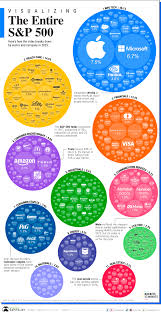

In [37]:
def plot_stock_data(df, tickers):
    plt.figure(figsize=(10, 6))
    for ticker in tickers:
        selected_stock_data = df[df['Symbol'] == ticker]
        plt.plot(selected_stock_data.index, selected_stock_data['Close'], marker='', linestyle='--', label=ticker, linewidth=1.5)
    plt.title('Historical Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assume subset_sp500_etf is your DataFrame with datetime index
preselected_tickers = ['SPY', 'AAPL', 'PFE', 'V', 'AMZN', 'META', 'XOM']

# Define multi-select dropdown widget
ticker_multiselect = widgets.SelectMultiple(options=preselected_tickers, description='Tickers:')

# Use interact to dynamically update the plot based on the selected tickers
interact(plot_stock_data, df=widgets.fixed(combined_sp500_historical), tickers=ticker_multiselect)


interactive(children=(SelectMultiple(description='Tickers:', options=('SPY', 'AAPL', 'PFE', 'V', 'AMZN', 'META…

<function __main__.plot_stock_data(df, tickers)>

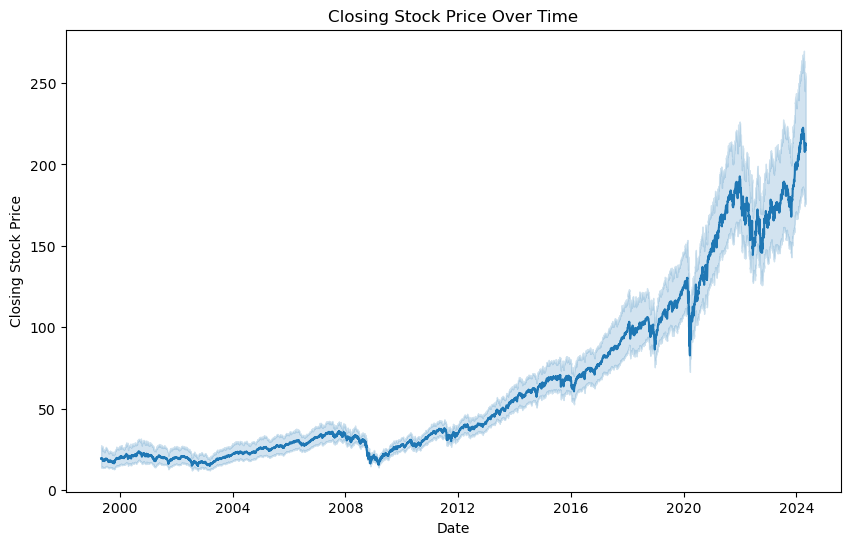

In [38]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=combined_sp500_historical)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

/var/folders/rp/3sfrhrt53jgf6ps870y224hw0000gn/T/ipykernel_69102/2065169211.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.matshow(corr1,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)


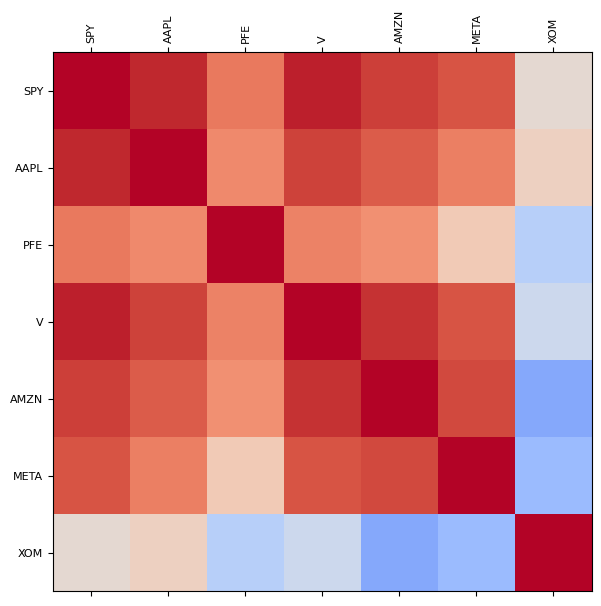

In [39]:
#find correlation matrix, i.e. the "distances" between each stock we will use the standardized data 
corr1 = scaled_subset_combined_sp500.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr1,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr1.columns)), corr1.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr1.columns)), corr1.columns, fontsize=8);


The correlation matrix above shows the 6 stocks and describes the correlation. The bluer the shade the less correlated, the redder the shade the more correlated. 

The matrix shows us that all stocks have a strong correlation with the SPY etf.

In [47]:
correlation = pivot_combined_sp500_historical.corrwith(pivot_combined_sp500_historical['SPY'])

# Exclude the ticker with the highest correlation
highest_corr_ticker = correlation.idxmax()
correlation_excluding_highest = correlation.drop(highest_corr_ticker)

# Find the ticker (or feature name) with the second highest correlation
second_highest_corr_ticker = correlation_excluding_highest.idxmax()
second_highest_corr_value = correlation_excluding_highest.max()

# Print the result
print("Second highest correlation:")
print("Ticker:", second_highest_corr_ticker)
print("Correlation:", second_highest_corr_value)


# Find the ticker (or feature name) with the lowest correlation
lowest_corr_ticker = correlation.idxmin()
lowest_corr_value = correlation.min()

print("\nLowest correlation:")
print("Ticker:", lowest_corr_ticker)
print("Correlation:", lowest_corr_value)



Second highest correlation:
Ticker: ACN
Correlation: 0.9932393115966325

Lowest correlation:
Ticker: NCLH
Correlation: -0.5974041890412645


The results:
the highest correlated stock to the SPY etf is Accenture ACN - information technology
the lowest corrrelated stock to the SPY etf is Norwegian Cruise Line NCLH - consumer discrectionary

Now lets see how the correlation of the companies with the heaviest weight in each sector compares: 

In [48]:
# Find the correlation coefficient of the specific ticker
aapl_corr = correlation.loc['AAPL']
amzn_corr = correlation.loc['AMZN']

# Print the result
print("Correlation coefficient for", 'Apple', ":", aapl_corr)
print("Correlation coefficient for", 'Amazon', ":", amzn_corr)

Correlation coefficient for Apple : 0.9663722495847535
Correlation coefficient for Amazon : 0.9611406965681067


In [49]:
combined_sp500_closing_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 1999-05-03 00:00:00-04:00 to 2024-05-01 00:00:00-04:00
Columns: 502 entries, A to ZTS
dtypes: float64(502)
memory usage: 24.1 MB


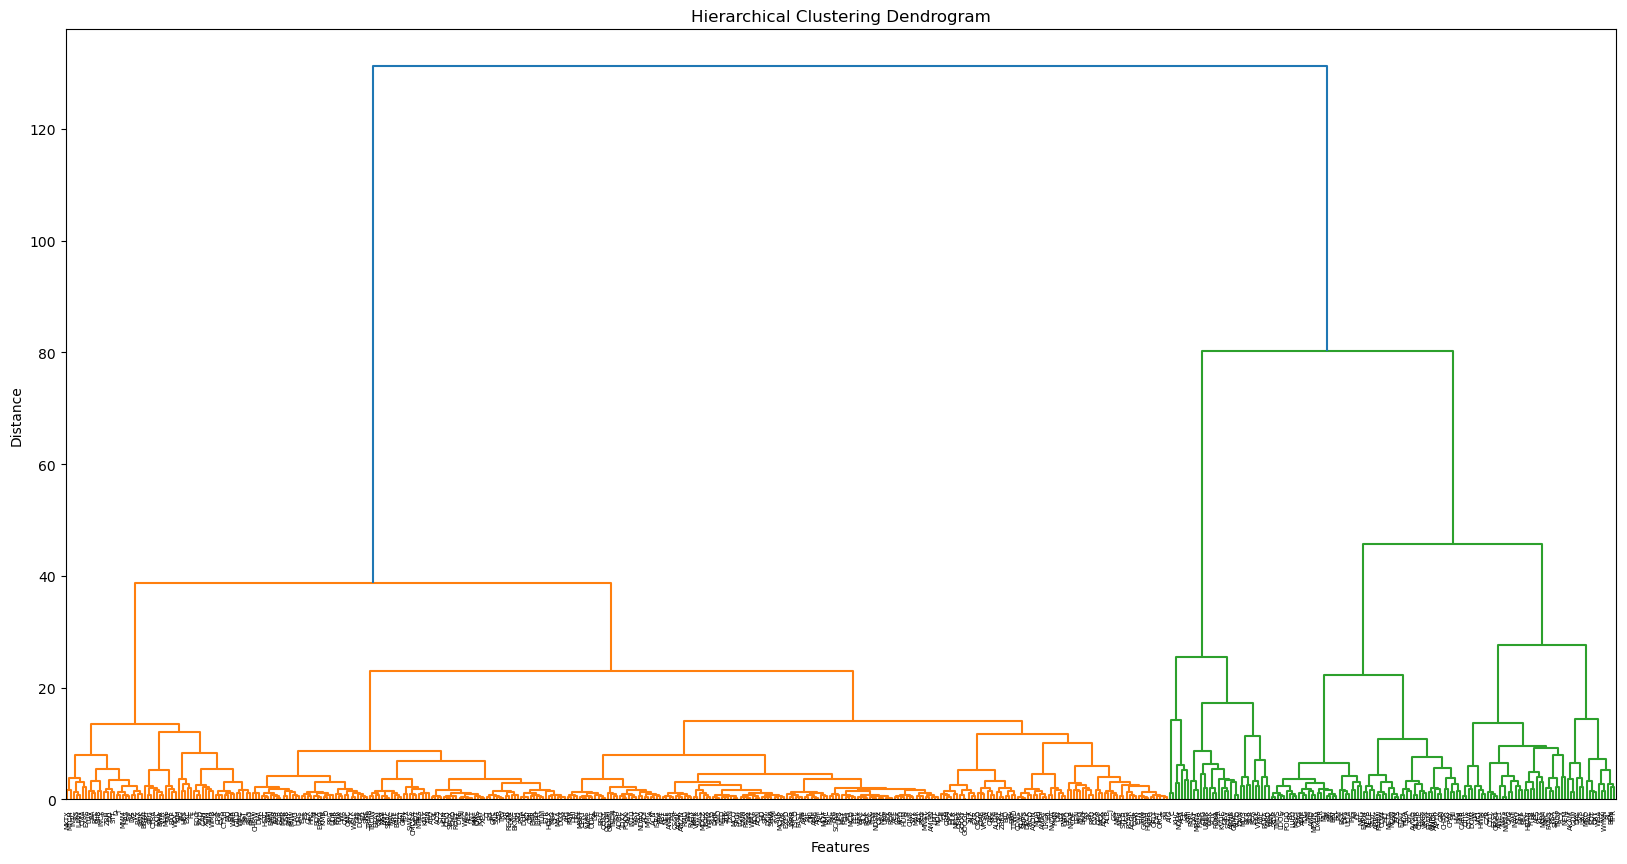

In [50]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute pairwise distances using correlation distance
distance_matrix = combined_sp500_closing_price.corr()

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')  # You can choose a different method as needed

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, labels=combined_sp500_closing_price.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()


In [51]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import ipywidgets as widgets
from IPython.display import display

# Compute pairwise distances using correlation distance
distance_matrix = combined_sp500_closing_price.corr()

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')  # You can choose a different method as needed

# Define a function to plot dendrogram with interactive zoom
def plot_dendrogram(zoom_range):
    plt.figure(figsize=(20, 10))
    dendrogram(Z, labels=combined_sp500_closing_price.columns)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.ylim([0, zoom_range])  # Adjust the y-axis limit based on zoom range
    plt.show()

# Create a slider widget for zoom range
zoom_slider = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Zoom Range:')
interactive_plot = widgets.interactive(plot_dendrogram, zoom_range=zoom_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=100, description='Zoom Range:', max=500, min=10, step=10), Output()), _d…

#### Conclusion: 

Correlation is important to visualize when it comes to stock closing prices because, the higher the correlation means the more similarly the stocks behave the lower correlation the less similar they behave. When it comes to portfolio diversification, you want stocks that have lower correlation closer to 0. 